In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [51]:
# Load bread cancer dataset from sklearn
data = load_breast_cancer()
X, y = data.data, data.target
print(X.shape, y.shape)
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target 

print(data.DESCR)
malignant_count = (data.target == 0).sum()
print("Number of malignant cases:", malignant_count)
benign_count = (data.target == 1).sum()
print("Number of benign cases:", benign_count)





(569, 30) (569,)
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Wors

In [52]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [55]:
# Train models
knn.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
# Make predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [57]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }


In [58]:
# Evaluate models
knn_results = evaluate_model(y_test, y_pred_knn)
dt_results = evaluate_model(y_test, y_pred_dt)
rf_results = evaluate_model(y_test, y_pred_rf)


In [59]:
# Convert results to DataFrame
results_df = pd.DataFrame([knn_results, dt_results, rf_results], index=["KNN", "Decision Tree", "Random Forest"])
print(results_df)

               Accuracy  Precision    Recall  F1-score
KNN            0.947368   0.957746  0.957746  0.957746
Decision Tree  0.947368   0.957746  0.957746  0.957746
Random Forest  0.964912   0.958904  0.985915  0.972222


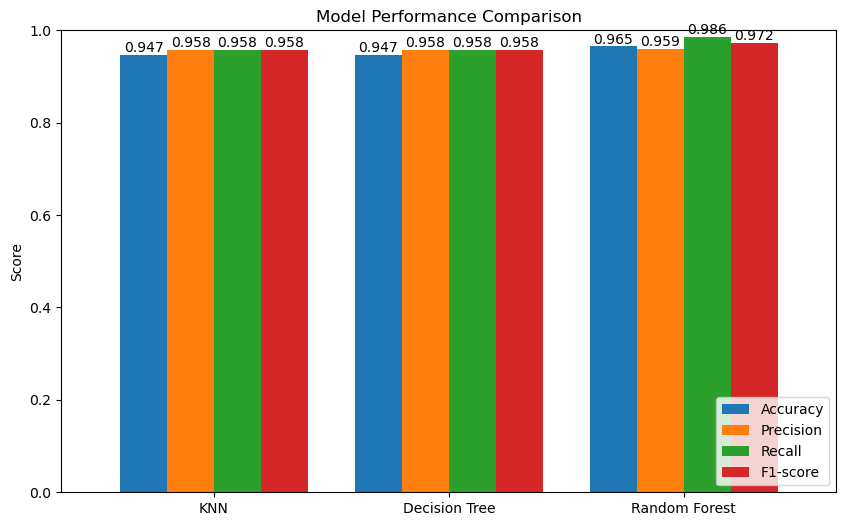

In [ ]:
# Plot results of models
plot = results_df.plot(kind='bar', figsize=(10,6), width=0.8)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
for p in plot.patches:
    plot.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.show()

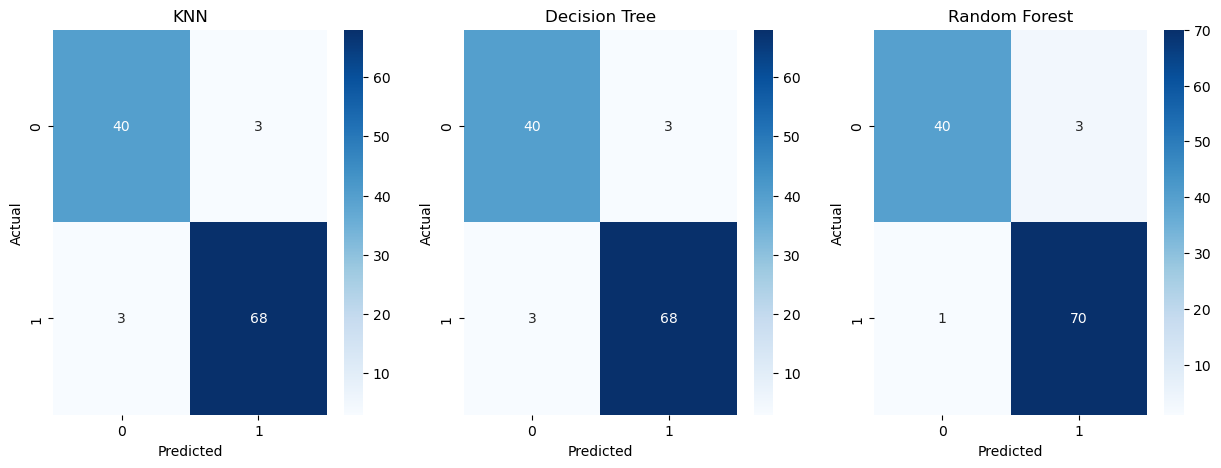

In [ ]:
# Confusion matrices for models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
models = {"KNN": y_pred_knn, "Decision Tree": y_pred_dt, "Random Forest": y_pred_rf}
for ax, (model_name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.show()

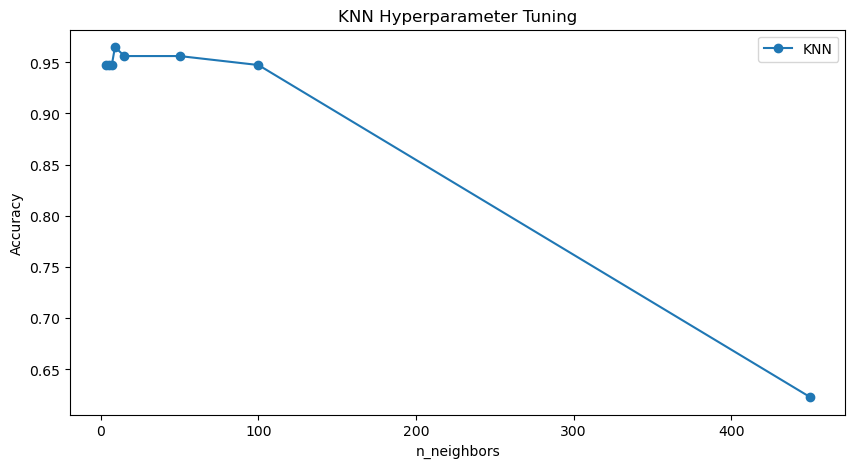

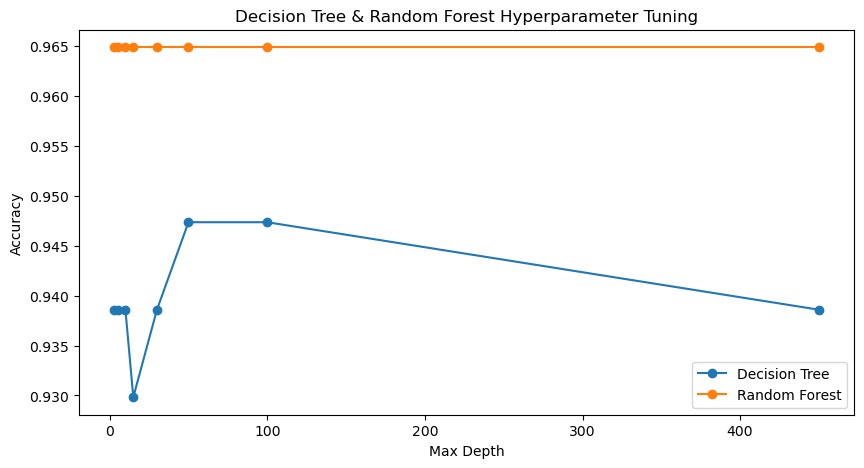

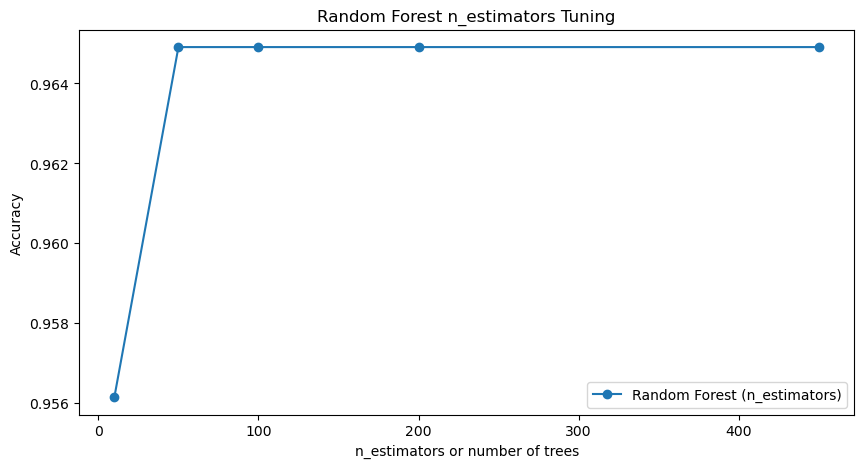

In [ ]:
# Hyperparameter tuning - Ablation study
neighbors = [3, 5, 7, 9, 15, 50, 100, 450]
max_depths = [3, 5, 10, 15, 30, 50, 100, 450]
n_estimators_list = [10, 50, 100, 200, 450] 

knn_nearest_neighbors_score = []
dt_max_depth_scores = []
rf_max_depth_scores = []
rf_n_estimators_scores = []

# KNN Hyperparameter Tuning
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    knn_nearest_neighbors_score.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

# Decision Tree and Random Forest Hyperparameter Tuning
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    dt_max_depth_scores.append(accuracy_score(y_test, dt.predict(X_test)))

    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    rf_max_depth_scores.append(accuracy_score(y_test, rf.predict(X_test)))

# Random Forest n_estimators Tuning
for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=42)  # Fixed depth for fair comparison
    rf.fit(X_train, y_train)
    rf_n_estimators_scores.append(accuracy_score(y_test, rf.predict(X_test)))

# Plot KNN Hyperparameter Tuning
plt.figure(figsize=(10, 5))
plt.plot(neighbors, knn_nearest_neighbors_score, marker='o', label='KNN')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.legend()
plt.show()

# Plot Decision Tree & Random Forest Hyperparameter Tuning
plt.figure(figsize=(10, 5))
plt.plot(max_depths, dt_max_depth_scores, marker='o', label='Decision Tree')
plt.plot(max_depths, rf_max_depth_scores, marker='o', label='Random Forest')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree & Random Forest Hyperparameter Tuning")
plt.legend()
plt.show()

# Plot Random Forest n_estimators Tuning
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, rf_n_estimators_scores, marker='o', label='Random Forest (n_estimators)')
plt.xlabel("n_estimators or number of trees")
plt.ylabel("Accuracy")
plt.title("Random Forest n_estimators Tuning")
plt.legend()
plt.show()


In [ ]:
#To Print the actual accuracy results of the hyperparameter tunings
print("KNN nearest neighbors tunning accuracy result: ", knn_nearest_neighbors_score)
print("Decision Tree max_depth tunning accuracy result: ", dt_max_depth_scores)
print("Random Forest max_depth tunning accuracy result: ", rf_max_depth_scores)
print("Random Forest n_estimators tunning accuracy result: ", rf_n_estimators_scores)

KNN nearest neighbors tunning accuracy result:  [0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.6228070175438597]
Decision Tree max_depth tunning accuracy result:  [0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702]
Random Forest max_depth tunning accuracy result:  [0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544]
Random Forest n_estimators tunning accuracy result:  [0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544]
